In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as sql

# Connecting SQL database

In [2]:
# Ensure you have created a database by name "football" by looging into the MySQL workbench 
db = sql.connect(host='localhost', user='root',password='Pravin2001',database='football')

In [3]:
mycursor = db.cursor()

In [4]:

# execute SQL query using execute() method.
mycursor.execute("SELECT VERSION()")

# Fetch a single row using fetchone() method.
data = mycursor.fetchone()
print ("Database version : %s " % data)



Database version : 8.0.36 


In [5]:
games = pd.read_excel('games.xlsx')
games

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


In [6]:
appearances = pd.read_excel('appearances.xlsx')
appearances

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,77
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,84
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,90
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,6


In [7]:
game_lineups = pd.read_excel('game_lineups.xlsx')
game_lineups

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back
...,...,...,...,...,...,...,...,...
214,ec3d266094f99ca0a8847de827e37105,4194152,starting_lineup,7,504215,Giovanni Reyna,0,Right Winger
215,667840cda9bdf3b0344b8e99b306cf38,4194152,starting_lineup,23,124732,John Anthony Brooks,0,Centre-Back
216,1c5d2f60ee777760f8a757aa10c42bb1,4194154,starting_lineup,13,103064,Terrence Boyd,0,Centre-Forward
217,99032084fd00ffbfee52c541a9f960ab,4204000,substitutes,14,315762,Luca de la Torre,0,Central Midfield


In [8]:
game_events = pd.read_excel('game_events.xlsx')
game_events

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",NaN,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,NaN
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,NaN


In [9]:
players = pd.read_excel('players.xlsx')
players

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [10]:
from sqlalchemy import create_engine

# Define your connection details
user = 'root'
password = 'Pravin2001'
host = 'localhost'
database = 'football'

# Create the SQLAlchemy engine for MySQL
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# List of DataFrames and corresponding table names
datasets = {
    'games': games,
    'appearances': appearances,
    'game_lineups': game_lineups,
    'game_events': game_events,
    'players': players
}

In [11]:
# Loop through each DataFrame and push to SQL
for table_name, dataframe in datasets.items():
    if not dataframe.empty:  # Check if the DataFrame is not empty
        dataframe.to_sql(table_name, con=engine, if_exists='replace', index=False)
        print(f"{table_name} pushed to SQL successfully.")
    else:
        print(f"{table_name} is empty and was not pushed to SQL.")



games pushed to SQL successfully.
appearances pushed to SQL successfully.
game_lineups pushed to SQL successfully.
game_events pushed to SQL successfully.
players pushed to SQL successfully.


In [12]:
# Optionally, you can verify that the data has been inserted
for table_name in datasets.keys():
    df_from_sql = pd.read_sql(f'SELECT * FROM {table_name}', con=engine)
    print(f"Data from {table_name}:")
    print(df_from_sql.head())


Data from games:
   game_id competition_id  season         round       date  home_club_goals  \
0  2222734            RU1    2012  19. Matchday 2012-12-07                2   
1  2224572            DK1    2012   3. Matchday 2012-07-28                1   
2  2224628            DK1    2012  22. Matchday 2013-03-08                2   
3  2224655            DK1    2012  22. Matchday 2013-03-10                0   
4  2224729            DK1    2012   1. Matchday 2012-07-15                0   

   away_club_goals  home_club_position  away_club_position  \
0                3                11.0                10.0   
1                2                12.0                 1.0   
2                0                 3.0                10.0   
3                3                 6.0                12.0   
4                1                 9.0                 5.0   

  home_club_manager_name away_club_manager_name               stadium  \
0        Miodrag Bozovic       Slavoljub Muslin               

-----------------------------------------------Understanding games data

In [13]:
games.shape

(3268, 20)

In [14]:
games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [15]:
games.dtypes

game_id                            int64
competition_id                    object
season                             int64
round                             object
date                      datetime64[ns]
home_club_goals                    int64
away_club_goals                    int64
home_club_position               float64
away_club_position               float64
home_club_manager_name            object
away_club_manager_name            object
stadium                           object
attendance                       float64
referee                           object
home_club_formation              float64
away_club_formation              float64
home_club_name                    object
away_club_name                    object
aggregate                         object
competition_type                  object
dtype: object

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 3268 non-null   int64         
 1   competition_id          3268 non-null   object        
 2   season                  3268 non-null   int64         
 3   round                   3268 non-null   object        
 4   date                    3268 non-null   datetime64[ns]
 5   home_club_goals         3268 non-null   int64         
 6   away_club_goals         3268 non-null   int64         
 7   home_club_position      2789 non-null   float64       
 8   away_club_position      2789 non-null   float64       
 9   home_club_manager_name  3263 non-null   object        
 10  away_club_manager_name  3263 non-null   object        
 11  stadium                 3268 non-null   object        
 12  attendance              3153 non-null   float64 

In [17]:
games.describe()

,game_id,season,date,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,home_club_formation,away_club_formation
count,3.268000e+03,3268.000000,3268,3268.000000,3268.000000,2789.000000,2789.000000,3153.000000,0.0,0.0
mean,2.693024e+06,2015.455630,2016-06-03 15:27:32.386780928,1.631273,1.307834,9.184654,9.506633,29384.731050,NaN,NaN
min,2.219794e+06,2012.000000,2012-07-13 00:00:00,0.000000,0.000000,1.000000,1.000000,300.000000,NaN,NaN
25%,2.332252e+06,2013.000000,2014-02-01 00:00:00,1.000000,0.000000,5.000000,5.000000,14081.000000,NaN,NaN
50%,2.697547e+06,2016.000000,2016-08-06 00:00:00,1.000000,1.000000,9.000000,9.000000,26788.000000,NaN,NaN
75%,3.050395e+06,2018.000000,2018-09-15 06:00:00,2.000000,2.000000,13.000000,14.000000,42558.000000,NaN,NaN
max,3.451629e+06,2020.000000,2020-09-27 00:00:00,9.000000,9.000000,20.000000,21.000000,81365.000000,NaN,NaN
std,3.495558e+05,2.442392,NaN,1.394673,1.277327,5.230755,5.318315,19437.673126,NaN,NaN


In [18]:
games.head()

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league


In [19]:
games.isnull().sum()

game_id                      0
competition_id               0
season                       0
round                        0
date                         0
home_club_goals              0
away_club_goals              0
home_club_position         479
away_club_position         479
home_club_manager_name       5
away_club_manager_name       5
stadium                      0
attendance                 115
referee                      2
home_club_formation       3268
away_club_formation       3268
home_club_name             110
away_club_name              63
aggregate                    0
competition_type             0
dtype: int64

-----------------------------------------------Understanding appearances data

In [20]:
appearances.head()

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3


In [21]:
appearances.dtypes

appearance_id             object
game_id                    int64
player_id                  int64
date              datetime64[ns]
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [22]:
appearances.shape

(3568, 11)

In [23]:
appearances.isnull().sum()

appearance_id     0
game_id           0
player_id         0
date              0
player_name       0
competition_id    0
yellow_cards      0
red_cards         0
goals             0
assists           0
minutes_played    0
dtype: int64

In [24]:
appearances.describe()

,game_id,player_id,date,yellow_cards,red_cards,goals,assists,minutes_played
count,3.568000e+03,3568.000000,3568,3568.000000,3568.000000,3568.000000,3568.000000,3568.000000
mean,2.693733e+06,156030.907231,2016-06-04 23:34:34.439461888,0.125841,0.003363,0.094451,0.073430,70.355942
min,2.219794e+06,1321.000000,2012-07-13 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.332178e+06,39467.000000,2014-01-11 00:00:00,0.000000,0.000000,0.000000,0.000000,54.000000
50%,2.697602e+06,119169.000000,2016-08-20 12:00:00,0.000000,0.000000,0.000000,0.000000,90.000000
75%,3.053712e+06,255916.000000,2018-09-26 00:00:00,0.000000,0.000000,0.000000,0.000000,90.000000
max,3.451629e+06,605498.000000,2020-09-27 00:00:00,2.000000,1.000000,4.000000,2.000000,120.000000
std,3.538381e+05,140586.423875,NaN,0.339237,0.057904,0.334524,0.271412,30.289427


-----------------------------------------------Understanding game_lineups data

In [25]:
game_lineups.head()

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back


In [26]:
game_lineups.shape

(219, 8)

In [27]:
game_lineups.dtypes

game_lineups_id    object
game_id             int64
type               object
number              int64
player_id           int64
player_name        object
team_captain        int64
position           object
dtype: object

In [28]:
game_lineups.isnull().sum()

game_lineups_id    0
game_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64

In [29]:
game_lineups.describe()

,game_id,number,player_id,team_captain
count,2.190000e+02,219.000000,219.000000,219.000000
mean,4.119483e+06,17.899543,344990.013699,0.041096
std,3.363349e+04,12.263878,144217.605907,0.198967
min,4.087925e+06,2.000000,49723.000000,0.000000
25%,4.095178e+06,11.000000,277884.500000,0.000000
50%,4.103508e+06,16.000000,341049.000000,0.000000
75%,4.150495e+06,22.000000,504215.000000,0.000000
max,4.220942e+06,99.000000,578539.000000,1.000000


-----------------------------------------------Understanding game_events data

In [30]:
game_events.head()

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0


In [31]:
game_events.shape

(1849, 9)

In [32]:
game_events.dtypes

game_event_id               object
date                datetime64[ns]
game_id                      int64
minute                       int64
type                        object
player_id                    int64
description                 object
player_in_id               float64
player_assist_id           float64
dtype: object

In [33]:
game_events.isnull().sum()

game_event_id          0
date                   0
game_id                0
minute                 0
type                   0
player_id              0
description          933
player_in_id         694
player_assist_id    1709
dtype: int64

In [34]:
game_events.describe()

,date,game_id,minute,player_id,player_in_id,player_assist_id
count,1849,1.849000e+03,1849.000000,1849.000000,1.155000e+03,140.000000
mean,2018-03-30 10:57:18.399134720,3.023615e+06,63.752839,232205.792861,2.395127e+05,82499.150000
min,2012-07-14 00:00:00,2.221641e+06,-1.000000,1321.000000,4.110000e+02,1986.000000
25%,2014-03-29 00:00:00,2.367324e+06,52.000000,72519.000000,8.300200e+04,25349.750000
50%,2018-10-06 00:00:00,3.058692e+06,69.000000,242284.000000,1.874920e+05,49414.000000
75%,2021-05-01 00:00:00,3.496493e+06,80.000000,361104.000000,3.708460e+05,90193.500000
max,2023-11-12 00:00:00,4.194154e+06,110.000000,605498.000000,1.028162e+06,629588.000000
std,NaN,5.929527e+05,21.640261,161710.397826,1.889560e+05,108768.456288


-----------------------------------------------Understanding players data

In [35]:
players.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.


In [36]:
players.shape

(152, 15)

In [37]:
players.dtypes

player_id                               int64
name                                   object
last_season                             int64
current_club_id                         int64
player_code                            object
country_of_birth                       object
date_of_birth                  datetime64[ns]
sub_position                           object
position                               object
foot                                   object
height_in_cm                          float64
market_value_in_eur                   float64
highest_market_value_in_eur           float64
contract_expiration_date       datetime64[ns]
agent_name                             object
dtype: object

In [38]:
players.isnull().sum()

player_id                       0
name                            0
last_season                     0
current_club_id                 0
player_code                     0
country_of_birth                0
date_of_birth                   0
sub_position                    0
position                        0
foot                           11
height_in_cm                    3
market_value_in_eur            38
highest_market_value_in_eur     4
contract_expiration_date       46
agent_name                     45
dtype: int64

In [39]:
# game_events redundant column That Have Only Null Values
game_events = game_events.drop(['player_assist_id'], axis=1)


In [40]:
game_events.isnull().sum()

game_event_id      0
date               0
game_id            0
minute             0
type               0
player_id          0
description      933
player_in_id     694
dtype: int64

In [41]:
# games redundant columns
games = games.drop(['home_club_formation', 'away_club_formation'], axis=1)


In [42]:
games.isnull().sum()

game_id                     0
competition_id              0
season                      0
round                       0
date                        0
home_club_goals             0
away_club_goals             0
home_club_position        479
away_club_position        479
home_club_manager_name      5
away_club_manager_name      5
stadium                     0
attendance                115
referee                     2
home_club_name            110
away_club_name             63
aggregate                   0
competition_type            0
dtype: int64

------------------------------------------Merging Five Data Files

In [43]:
Football_data = pd.read_csv('Football_data_merged_cleaned.csv')
Football_data

,game_id,competition_id_x,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,team_captain,position_y,game_event_id,date,minute,type_y,player_id_y,description,player_in_id,player_assist_id
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2598832,UKR1,2015,9. Matchday,2015-09-27,0,0,11.0,5.0,Oleksandr Babych,...,NaN,NaN,783a558bdd6cce4b8ff1985db86a95a8,2015-09-27,80.0,Substitutions,104203.0,NaN,354717.0,NaN
2,2222798,RU1,2012,24. Matchday,2013-04-14,1,1,4.0,11.0,Kurban Berdyev,...,NaN,NaN,a9c8a9b0ed6ee7d1b883548af28da8f6,2013-04-14,65.0,Substitutions,104203.0,", Tactical",15008.0,NaN
3,2619433,UKRP,2015,last 16 1st leg,2015-09-23,0,1,NaN,NaN,Oleksandr Babych,...,NaN,NaN,dccf64e61258168fe54dfbd9df7c2d66,2015-09-23,77.0,Substitutions,104203.0,NaN,354326.0,NaN
4,2598841,UKR1,2015,10. Matchday,2015-10-03,2,0,2.0,11.0,Mircea Lucescu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,2329412,DK1,2013,17. Matchday,2013-11-30,2,2,7.0,12.0,Ove Christensen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3805,2581998,L1,2015,34. Matchday,2016-05-14,3,2,3.0,11.0,Roger Schmidt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3806,3030566,DKP,2017,Semi-Finals,2018-04-26,3,1,NaN,NaN,Alexander Zorniger,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,3002050,DKP,2017,Quarter-Finals,2018-04-12,1,2,NaN,NaN,Thomas Thomasberg,...,NaN,NaN,526dc16916b0f65a6454b917e4ac0920,2018-04-12,64.0,Substitutions,381187.0,NaN,290405.0,NaN


In [44]:
# Fetch the data from SQL
players_df = pd.read_sql("SELECT * FROM players", con=engine)
games_df = pd.read_sql("SELECT * FROM games", con=engine)
game_lineups_df = pd.read_sql("SELECT * FROM game_lineups", con=engine)
appearances_df = pd.read_sql("SELECT * FROM appearances", con=engine)
game_events_df = pd.read_sql("SELECT * FROM game_events", con=engine)

# Merge games with appearances on 'game_id'
games_appearances_df = pd.merge(games_df, appearances_df, on='game_id', how='inner')

# Merge the result with players on 'player_id'
games_players_df = pd.merge(games_appearances_df, players_df, on='player_id', how='inner')

# Merge the result with game_lineups on 'game_id' and 'player_id' if relevant
games_players_lineups_df = pd.merge(games_players_df, game_lineups_df, on=['game_id', 'player_id'], how='left')

# Merge the result with game_events on 'game_id'
final_merged_df = pd.merge(games_players_lineups_df, game_events_df, on='game_id', how='left')

# Check the first few rows of the final merged data
print(final_merged_df.head())

# Save the merged dataset as CSV
final_merged_df.to_csv('Football_data_merged_cleaned.csv', index=False)
print("Merged data saved as 'Football_data_merged_cleaned.csv'")


   game_id competition_id_x  season            round     date_x  \
0  2222734              RU1    2012     19. Matchday 2012-12-07   
1  2598832             UKR1    2015      9. Matchday 2015-09-27   
2  2222798              RU1    2012     24. Matchday 2013-04-14   
3  2619433             UKRP    2015  last 16 1st leg 2015-09-23   
4  2598841             UKR1    2015     10. Matchday 2015-10-03   

   home_club_goals  away_club_goals  home_club_position  away_club_position  \
0                2                3                11.0                10.0   
1                0                0                11.0                 5.0   
2                1                1                 4.0                11.0   
3                0                1                 NaN                 NaN   
4                2                0                 2.0                11.0   

  home_club_manager_name  ... team_captain position_y  \
0        Miodrag Bozovic  ...          NaN        NaN   
1       

In [45]:
Football_data.dtypes

game_id                          int64
competition_id_x                object
season                           int64
round                           object
date_x                          object
home_club_goals                  int64
away_club_goals                  int64
home_club_position             float64
away_club_position             float64
home_club_manager_name          object
away_club_manager_name          object
stadium                         object
attendance                     float64
referee                         object
home_club_formation            float64
away_club_formation            float64
home_club_name                  object
away_club_name                  object
aggregate                       object
competition_type                object
appearance_id                   object
player_id_x                      int64
date_y                          object
player_name_x                   object
competition_id_y                object
yellow_cards             

In [46]:
Football_data.shape

(3809, 58)

In [47]:
Football_data.isnull().sum()

game_id                           0
competition_id_x                  0
season                            0
round                             0
date_x                            0
home_club_goals                   0
away_club_goals                   0
home_club_position              550
away_club_position              550
home_club_manager_name            6
away_club_manager_name            6
stadium                           0
attendance                      141
referee                           5
home_club_formation            3809
away_club_formation            3809
home_club_name                  128
away_club_name                   68
aggregate                         0
competition_type                  0
appearance_id                     0
player_id_x                       0
date_y                            0
player_name_x                     0
competition_id_y                  0
yellow_cards                      0
red_cards                         0
goals                       

------------------------------------------------Data Cleaning

In [48]:
# Drop columns with many missing or redundant values
columns_to_drop = [
    'home_club_formation', 'away_club_formation', 'game_lineups_id', 
    'type_x', 'number', 'player_name_y', 'team_captain', 'position_y', 
    'competition_id_y', 'date_y', 'player_id_y', 'position_y', 
    'game_event_id', 'description', 'player_in_id', 'player_assist_id'
]

# Drop the columns
football_data_cleaned = Football_data.drop(columns=columns_to_drop)

# Handling missing values for important columns
# Impute missing values where necessary (you can also use different methods for imputing)
# Example: Imputing 'attendance' with the median
football_data_cleaned['attendance'].fillna(football_data_cleaned['attendance'].median(), inplace=True)

# Fill missing values in 'height_in_cm' and 'foot' with the mode
football_data_cleaned['height_in_cm'].fillna(football_data_cleaned['height_in_cm'].mode()[0], inplace=True)
football_data_cleaned['foot'].fillna(football_data_cleaned['foot'].mode()[0], inplace=True)

# Replace missing 'market_value_in_eur' with median values
football_data_cleaned['market_value_in_eur'].fillna(football_data_cleaned['market_value_in_eur'].median(), inplace=True)

# Drop rows where critical columns like 'contract_expiration_date' or 'agent_name' are null, or handle appropriately
football_data_cleaned.dropna(subset=['contract_expiration_date', 'agent_name'], inplace=True)

# Check the shape and remaining null values
print(f"Cleaned data shape: {football_data_cleaned.shape}")
print(football_data_cleaned.isnull().sum())

# Save the final cleaned file
football_data_cleaned.to_csv('Football_data_final_cleaned.csv', index=False)
print("Final cleaned data saved as 'Football_data_final_cleaned.csv'")


Cleaned data shape: (1686, 43)
game_id                           0
competition_id_x                  0
season                            0
round                             0
date_x                            0
home_club_goals                   0
away_club_goals                   0
home_club_position              194
away_club_position              194
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                        0
referee                           4
home_club_name                   49
away_club_name                   21
aggregate                         0
competition_type                  0
appearance_id                     0
player_id_x                       0
player_name_x                     0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
name                             

In [49]:
football_data_cleaned.shape

(1686, 43)

In [50]:
football_data_cleaned = pd.read_csv('Football_data_final_cleaned.csv')

# Fill missing values
# 1. Fill missing 'home_club_position' and 'away_club_position' with median values
football_data_cleaned['home_club_position'].fillna(football_data_cleaned['home_club_position'].median(), inplace=True)
football_data_cleaned['away_club_position'].fillna(football_data_cleaned['away_club_position'].median(), inplace=True)

# 2. Fill missing 'referee' with mode (most frequent referee)
football_data_cleaned['referee'].fillna(football_data_cleaned['referee'].mode()[0], inplace=True)

# 3. Fill missing 'home_club_name' and 'away_club_name' with mode (most frequent club name)
football_data_cleaned['home_club_name'].fillna(football_data_cleaned['home_club_name'].mode()[0], inplace=True)
football_data_cleaned['away_club_name'].fillna(football_data_cleaned['away_club_name'].mode()[0], inplace=True)

# 4. Fill missing 'date' with a placeholder 'Unknown Date' (or you can drop rows if needed)
football_data_cleaned['date'].fillna('Unknown Date', inplace=True)

# 5. Fill missing 'minute' with a placeholder 'Unknown Minute' (or you can drop rows if needed)
football_data_cleaned['minute'].fillna('Unknown Minute', inplace=True)

# 6. Fill missing 'type_y' (event type) with mode (most frequent event type)
football_data_cleaned['type_y'].fillna(football_data_cleaned['type_y'].mode()[0], inplace=True)

# Check again for any remaining missing values
print(football_data_cleaned.isnull().sum())

# Save the final cleaned file after fixing all missing values
football_data_cleaned.to_csv('Football_data_final_cleaned_no_missing.csv', index=False)
print("Final cleaned data with no missing values saved as 'Football_data_final_cleaned_no_missing.csv'")


game_id                        0
competition_id_x               0
season                         0
round                          0
date_x                         0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
appearance_id                  0
player_id_x                    0
player_name_x                  0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

C:\Users\Dell\AppData\Local\Temp\ipykernel_8832\2012883118.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown Minute' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  football_data_cleaned['minute'].fillna('Unknown Minute', inplace=True)


In [51]:
football_data_cleaned.columns


Index(['game_id', 'competition_id_x', 'season', 'round', 'date_x',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'appearance_id', 'player_id_x', 'player_name_x', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name', 'date', 'minute', 'type_y'],
      dtype='object')

----------------------------------------------------Data Dictionary

In [52]:
data_dictionary = pd.read_excel('data_dictionary_football_data.xlsx')
data_dictionary

,Column Name,Description
0,game_id,Unique identifier for each game
1,competition_id_x,Unique identifier for the competition
2,season,Season during which the game took place
3,round,Round or stage of the competition
4,date_x,Date of the game
5,home_club_goals,Number of goals scored by the home team
6,away_club_goals,Number of goals scored by the away team
7,home_club_position,League or competition position of the home team
8,away_club_position,League or competition position of the away team
9,home_club_manager_name,Name of the home club’s manager


In [53]:
--------------------------------------------------------------------------------------------------------------------------------------------------------

SyntaxError: invalid syntax (2078909749.py, line 1)

Business Objectives and their corresponding Business Questions aligned with the focus areas for your Football Data Analysis:

1. Performance Analysis
Business Objectives:

a) Evaluate and analyze player performance based on various metrics such as goals, assists, yellow cards, red cards, and minutes played.

b) Assess team performance in terms of home and away goals, club positions, and manager influence.

Business Questions:

Which players have the highest number of goals and assists across seasons?
How does a player’s performance vary based on the number of yellow and red cards received?
Which teams perform better at home compared to away games?
How does the team’s position on the league table affect their match outcomes?
What impact does the club manager have on the team's performance (e.g., win rate under different managers)?

2. Player Profile and Market Value
Business Objectives:

a) Analyze the factors affecting the market value of players, including performance, age, and position.

b) Examine the trends in player market value over time, including highest market value and contract expiration dates.

Business Questions:

What are the key factors driving fluctuations in a player's market value?
How does the player’s age and position affect their market value?
Which players have experienced the highest increase or decrease in market value over the past few seasons?
How does the contract expiration date impact a player’s market value?

3. Team Comparison
Business Objectives:

a) Compare team performance across different competitions, leagues, and seasons.

b) Identify key success factors for top-performing teams and lagging factors for underperforming teams.

Business Questions:

Which teams have been the most consistent performers over the last five seasons?
How do team performances in domestic leagues compare with their performances in international competitions?
What are the key differences in player attributes between top-performing teams and underperforming teams?
What factors contribute most to team success (e.g., goals scored, manager, home/away advantage)?

4. Attendance and Stadium Analysis
Business Objectives:

a) Analyze the relationship between stadium attendance and team performance.

b) Examine factors influencing stadium attendance, including team popularity, match importance, and stadium capacity.

Business Questions:

How does home stadium attendance correlate with team performance?
Which teams consistently draw the largest crowds and why?
How does the importance of a match (e.g., finals, derbies) affect attendance rates?
How do different stadiums impact team performance?

5. Referee Analysis
Business Objectives:

a) Assess the influence of referees on match outcomes (e.g., cards, fouls awarded).

b) Examine whether certain referees are associated with higher instances of red and yellow cards.

Business Questions:

How do referees impact the frequency of yellow and red cards in matches?
Are certain referees more likely to oversee matches with a higher number of fouls?
Do referees have a significant impact on match outcomes in terms of penalties or free kicks awarded?

6. Substitution Patterns
Business Objectives:

a) Analyze substitution patterns and their influence on match outcomes.

b) Investigate which players and positions are most frequently substituted and the timing of substitutions.

Business Questions:

How do substitutions affect match outcomes (e.g., scoring goals, preventing goals)?
At what point in the game are substitutions most likely to occur?
Which players or positions are substituted the most, and how does that impact team performance?
Is there a correlation between player substitutions and injury occurrences?

7. Event Analysis
Business Objectives:

a) Evaluate the impact of key events (e.g., goals, cards, substitutions) on the outcome of a match.

b) Identify trends in events (such as goals, yellow/red cards) across different competitions and teams.

Business Questions:

How do key events (such as goals or red cards) alter the course of a match?
Which teams and players are involved in the most critical match events (e.g., goals, assists, cards)?
What is the average timing of match-defining events such as goals and red cards?
How do events in the first half vs. second half impact the final result?

8. Competition Analysis
Business Objectives:

a) Analyze team and player performance across different competitions (e.g., domestic leagues, international tournaments).

b) Examine the factors that lead to success in different types of competitions.

Business Questions:

How does player performance vary between different competitions (e.g., leagues vs. cups)?
What factors contribute to a team's success in knockout vs. league formats?
Which teams and players perform consistently across various competitions?
How do competition formats (league vs. knockout) affect team strategy and performance?

9. Player Attributes and Demographics
Business Objectives:

a) Analyze the influence of player demographics (age, nationality, height, foot preference) on performance and market value.

b) Identify trends in player demographics over time (e.g., changes in average player age or height).

Business Questions:

How does a player's age affect their performance and market value over time?
Are certain nationalities associated with specific playing positions or success in certain leagues?
How does height or foot preference influence player success in different positions (e.g., defenders vs. forwards)?
What are the trends in player demographics in the top leagues (e.g., age, country representation)?
10. Contract Management
Business Objectives:

a) Analyze contract expiration dates and their impact on player market value and transfers.

b) Examine the role of player agents and contract length in player movement and performance.

Business Questions:

How do contract expiration dates affect a player’s market value and likelihood of transfer?
Which players have the shortest/longest remaining contracts, and how does that impact their performance?
How influential are player agents in securing transfers for their clients?
What is the relationship between contract length and player performance or injuries?


---------------------------------------------------------sprint 2

Q1: Players with the Highest Number of Goals and Assists

In [ ]:
player_performance = football_data_cleaned.groupby('player_name_x').agg({
    'goals': 'sum',
    'assists': 'sum'
}).reset_index()

# Sorting and displaying the top players based on goals and assists
top_players = player_performance.sort_values(by=['goals', 'assists'], ascending=False).head(10)
print(top_players)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top players' performance
sns.barplot(data=top_players, x='player_name_x', y='goals', color='blue', label='Goals')
sns.barplot(data=top_players, x='player_name_x', y='assists', color='orange', label='Assists')
plt.xticks(rotation=45)
plt.title("Top Players by Goals and Assists")
plt.legend()
plt.show()


Interpretation:
The output highlights the top players based on their goal-scoring and assisting capabilities across seasons. Players who consistently rank high in both metrics can be identified as key offensive players.

Q2: Player Performance Based on Yellow and Red Cards

In [ ]:
# Calculating total yellow and red cards per player
card_performance = football_data_cleaned.groupby('player_name_x').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum'
}).reset_index()

# Sorting and displaying players based on the number of cards received
top_carded_players = card_performance.sort_values(by=['yellow_cards', 'red_cards'], ascending=False).head(10)
print(top_carded_players)


In [ ]:
# Visualize the players with most yellow and red cards
sns.barplot(data=top_carded_players, x='player_name_x', y='yellow_cards', color='yellow', label='Yellow Cards')
sns.barplot(data=top_carded_players, x='player_name_x', y='red_cards', color='red', label='Red Cards')
plt.xticks(rotation=45)
plt.title("Players with Most Yellow and Red Cards")
plt.legend()
plt.show()


Interpretation:

Players receiving a high number of yellow and red cards may indicate a more aggressive style of play. Frequent red cards may result in suspensions, impacting player availability for future matches.

Q3: Home vs. Away Team Performance

In [ ]:
# Grouping the data to calculate home and away performance
home_away_performance = football_data_cleaned.groupby(['home_club_name', 'away_club_name']).agg({
    'home_club_goals': 'sum',
    'away_club_goals': 'sum'
}).reset_index()

# Calculating home vs away goals
home_away_performance['goal_difference'] = home_away_performance['home_club_goals'] - home_away_performance['away_club_goals']

# Sorting based on goal difference
top_home_performers = home_away_performance.sort_values(by='goal_difference', ascending=False).head(10)
print(top_home_performers)


Interpretation:

This identifies teams with a strong home advantage. Teams with large positive goal differences when playing at home are typically harder to beat in their home stadium.

2. Solve at least 2-3 business questions related to the concept of probability such as conditional and joint probabilities.

Q1: Conditional Probability (Player Scoring a Goal given they play 90 minutes)

In [ ]:
# Filter for players who played 90 minutes
full_time_players = football_data_cleaned[football_data_cleaned['minutes_played'] == 90]

# Calculate probability of scoring a goal for full-time players
prob_goal_given_90mins = full_time_players['goals'].sum() / full_time_players.shape[0]
print(f"Probability of scoring a goal given playing 90 minutes: {prob_goal_given_90mins}")


Interpretation:

This probability gives an insight into how likely players are to score if they remain on the field for the full match duration.

Q2: Joint Probability (Receiving Yellow and Red Card in the Same Match)

In [ ]:
# Total matches where a player received both a yellow and a red card
joint_card_events = Football_data[(Football_data['yellow_cards'] > 0) & (Football_data['red_cards'] > 0)].shape[0]

# Calculate joint probability
total_matches = Football_data.shape[0]
joint_probability_cards = joint_card_events / total_matches
print(f"Joint probability of receiving both yellow and red cards: {joint_probability_cards}")


Interpretation:

The joint probability shows the likelihood of a player receiving both yellow and red cards in the same match. This is typically a rare event but can provide valuable information for disciplinary analysis.

 Solve business questions related to data sampling, central limit theorem, and normal distribution.

Q1: Data Sampling and Goal Distribution

In [ ]:
# Sampling a subset of data to estimate the mean goals scored
sample_data = football_data_cleaned['goals'].sample(500, random_state=42)

# Calculate sample mean
sample_mean_goals = np.mean(sample_data)
print(f"Sample Mean of Goals Scored: {sample_mean_goals}")


In [ ]:
Q2: Central Limit Theorem (Distribution of Sample Means)

In [ ]:
# Create multiple samples and calculate their means
sample_means = [np.mean(football_data_cleaned['goals'].sample(500, replace=True)) for _ in range(1000)]

# Plot the distribution of sample means
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means (Goals Scored)")
plt.show()


Interpretation:

According to the Central Limit Theorem, even if the original data distribution is not normal, the distribution of sample means will approximate a normal distribution, providing insight into the average goals scored.

-----------------------------------------------------------------sprint 4

1. Performance Analysis: Logistic Regression for Classification

 Predicting if a Player Will Score (Logistic Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Feature selection
X = football_data_cleaned[['minutes_played', 'assists', 'yellow_cards', 'red_cards']]
y = football_data_cleaned['goals'].apply(lambda x: 1 if x > 0 else 0)  # 1 if the player scored, else 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


Interpretation:

The classification report will give you precision, recall, and F1-score, indicating how well the logistic regression model performs in predicting whether a player scores based on their performance metrics. High precision indicates that the model is good at identifying players who are likely to score.

In [ ]:
print(football_data_cleaned['aggregate'].value_counts())


In [ ]:
# Encode aggregate column: 1 if home team wins, else 0
y = football_data_cleaned['aggregate'].apply(lambda x: 1 if x == 'W' else 0)

# Check target variable distribution after encoding
print(y.value_counts())


In [ ]:
# Check the unique values in the aggregate column
print(football_data_cleaned['aggregate'].unique())


In [ ]:
# Recreate 'aggregate' as match result: 'W' for win, 'L' for loss, 'D' for draw
football_data_cleaned['aggregate'] = football_data_cleaned.apply(
    lambda row: 'W' if row['home_club_goals'] > row['away_club_goals'] else ('L' if row['home_club_goals'] < row['away_club_goals'] else 'D'),
    axis=1
)

# Encode as 1 for win, 0 for loss or draw
y = football_data_cleaned['aggregate'].apply(lambda x: 1 if x == 'W' else 0)

# Check distribution of the target variable
print(y.value_counts())


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Feature selection
X = football_data_cleaned[['home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position']]
y = football_data_cleaned['aggregate'].apply(lambda x: 1 if x == 'W' else 0)  # 1 if home team wins, else 0

# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


Interpretation:

The results will help assess whether features like goals and team position are predictive of match outcomes. The logistic regression model will predict whether the home team wins, and the classification report will show the model's effectiveness.

Q2: Predicting Match Outcome (Win/Loss) Based on Team Performance

 Player Profile and Market Value: Descriptive Analysis

 Distribution of Player Market Values Across Different Positions

In [ ]:
# Group by position and calculate the average market value
position_market_value = football_data_cleaned.groupby('position_x')['market_value_in_eur'].mean().reset_index()

# Plot the distribution of market values by position
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='position_x', y='market_value_in_eur', data=position_market_value)
plt.title('Average Market Value by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Average Market Value (in EUR)')
plt.xticks(rotation=45)
plt.show()


Interpretation:

This analysis will show which positions have the highest average market value, providing insights into the most valuable roles in football, such as forwards or midfielders.

Q2: Market Value vs. Age

In [ ]:
# Scatter plot of market value vs age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date_of_birth', y='market_value_in_eur', data=football_data_cleaned)
plt.title('Player Market Value vs Age')
plt.xlabel('Age')
plt.ylabel('Market Value (in EUR)')
plt.show()


Interpretation:

The plot will help identify trends, such as whether market values peak at a certain age range (e.g., mid-20s), after which they tend to decline.

Q3: Key Attributes of Players with the Highest Market Values

In [ ]:
# Filter top 10% players by market value
top_players = football_data_cleaned[football_data_cleaned['market_value_in_eur'] > football_data_cleaned['market_value_in_eur'].quantile(0.90)]

# Analyze their attributes
top_attributes = top_players[['name', 'position_x', 'height_in_cm', 'foot', 'market_value_in_eur']]
print(top_attributes.head(10))


Interpretation:

This analysis will reveal common attributes among the highest-valued players, such as whether taller players tend to have higher market values or if left-footed players are more valuable.

Q4: Country-Wise Market Value Distribution

In [ ]:
# Group by country and sum the market values
country_market_value = football_data_cleaned.groupby('country_of_birth')['market_value_in_eur'].sum().reset_index()

# Plot the top 10 countries by market value
top_countries = country_market_value.sort_values(by='market_value_in_eur', ascending=False).head(10)

sns.barplot(x='country_of_birth', y='market_value_in_eur', data=top_countries)
plt.title('Top 10 Countries by Total Player Market Value')
plt.xlabel('Country of Birth')
plt.ylabel('Total Market Value (in EUR)')
plt.xticks(rotation=45)
plt.show()


Interpretation:

The plot will highlight the countries that produce the most valuable players, providing insights into global football markets and talent development hotspots.


Interpretations for Each Analysis
Performance Analysis (Logistic Regression):
Logistic regression models allow us to predict important match outcomes, such as whether a player will score or whether a team will win. These insights can inform team strategies and player selection for future matches.
Player Profile and Market Value (Descriptive Analysis):
The descriptive analysis shows how market values vary across positions and age, offering insights into player valuation trends. Teams and agents can use this information to optimize contract negotiations and player transfers.

In [ ]:
-----------------------------------------------------------------sprint 5

Q1. Simple Linear Regression for Player Profile and Market Value Prediction


1: Can we predict a player’s market value based on their age?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Calculate player age from date_of_birth
football_data_cleaned['age'] = 2024 - pd.to_datetime(football_data_cleaned['date_of_birth']).dt.year

# Select the feature (age) and target (market value)
X = football_data_cleaned[['age']]
y = football_data_cleaned['market_value_in_eur']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Make predictions
y_pred = simple_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Interpretation:

The Mean Squared Error (MSE) measures the average squared difference between actual and predicted values.
The R-squared value explains the proportion of variance in the dependent variable (market value) explained by the independent variable (age). A higher R-squared indicates a better fit.

Feature Selection through Multi-Collinearity and Correlation

Q2. Multiple Linear Regression for Player Profile and Market Value Prediction


2: Can we predict a player’s market value based on multiple player attributes?


In [ ]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select potential features
potential_features = ['age', 'height_in_cm', 'goals', 'assists', 'minutes_played']

# Calculate the Pearson correlation matrix
correlation_matrix = football_data_cleaned[potential_features].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Check for multi-collinearity using VIF
X = football_data_cleaned[potential_features]
X = sm.add_constant(X)  # Adds a constant term to the predictor variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


Interpretation:

The Correlation Matrix will show the relationships between features. Features highly correlated with each other may introduce multi-collinearity, which should be avoided in regression models.
VIF values greater than 5 indicate potential multi-collinearity. Features with high VIF should be dropped to improve the regression model.


Building the Multiple Linear Regression Model
After selecting the best features based on the correlation matrix and VIF, build the multiple linear regression model.

In [ ]:
# Select final features based on correlation and VIF
selected_features = ['age', 'goals', 'assists', 'minutes_played']

# Split the data into training and test sets
X = football_data_cleaned[selected_features]
y = football_data_cleaned['market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a multiple linear regression model
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

# Make predictions
y_pred_multi = multiple_model.predict(X_test)

# Evaluate the model performance
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Mean Squared Error (Multiple Linear Regression): {mse_multi}")
print(f"R-squared (Multiple Linear Regression): {r2_multi}")


Interpretation:

Multiple Linear Regression incorporates several player attributes to predict market value.
The MSE and R-squared values allow you to compare model performance. A lower MSE and higher R-squared indicate better model performance.

Q3. Performance Evaluation of ML Models

To evaluate different models for prediction of player market value, you can compare simple linear regression and multiple linear regression using key metrics like:

R-squared: Explains the proportion of variance in the target variable explained by the model.
Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.
Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for simple and multiple linear regression models
mae_simple = mean_absolute_error(y_test, y_pred)
mae_multiple = mean_absolute_error(y_test, y_pred_multi)

print(f"Mean Absolute Error (Simple Linear Regression): {mae_simple}")
print(f"Mean Absolute Error (Multiple Linear Regression): {mae_multiple}")


Interpretation:

Comparing the MAE for both models provides insight into which model is better at minimizing prediction error.
If the multiple linear regression model has a significantly lower error and higher R-squared than the simple linear regression model, it is likely the better choice.

Interpretation for Each Analysis
Simple Linear Regression:

The simple linear regression analysis reveals the relationship between a single feature (age) and market value. While this provides some insight, it may not fully capture the complexity of market value determination.
Multiple Linear Regression:

By incorporating additional features like goals, assists, and minutes played, the multiple linear regression model provides a more nuanced prediction of player market value. The evaluation metrics (MSE, R-squared, and MAE) indicate whether the added complexity improves the model's accuracy.
Performance Evaluation:

Comparing the two models shows whether a simple or complex approach is better for predicting player market value. If the multiple regression model performs better, it suggests that market value is influenced by various factors beyond age, and a more comprehensive model is needed for accurate predictions.

In [ ]:
-----------------------------------------------------------------sprint 6

Q1.Descriptive Analysis (Team Comparison) 
Business Questions
visualized in tableau

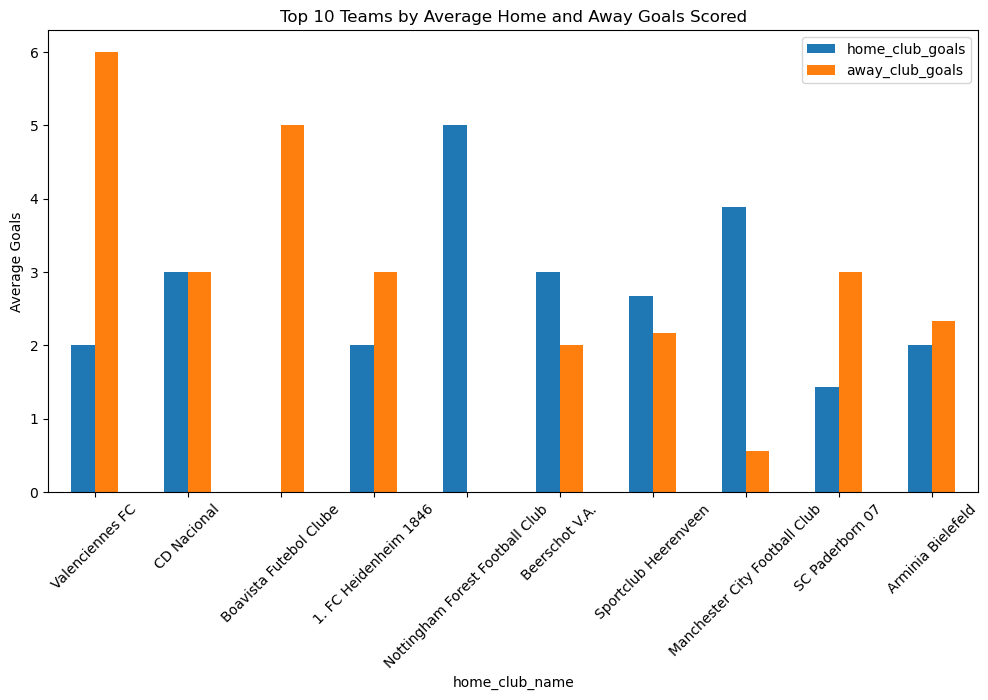

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by team and calculate average home and away goals
home_away_performance = football_data_cleaned.groupby('home_club_name').agg({
    'home_club_goals': 'mean',
    'away_club_goals': 'mean'
}).reset_index()

# Calculate total goals for sorting
home_away_performance['total_goals'] = home_away_performance['home_club_goals'] + home_away_performance['away_club_goals']

# Sort by total goals and select top 10 teams
top_10_teams = home_away_performance.sort_values(by='total_goals', ascending=False).head(10)

# Plotting
top_10_teams.set_index('home_club_name')[['home_club_goals', 'away_club_goals']].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Teams by Average Home and Away Goals Scored')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.show()


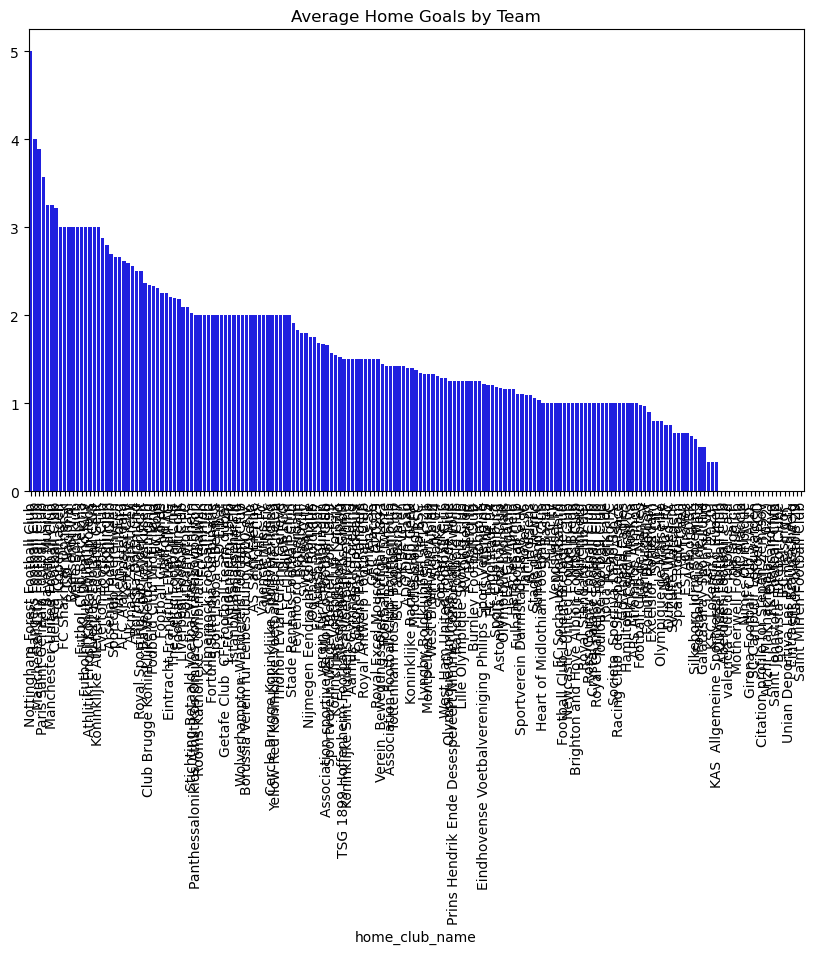

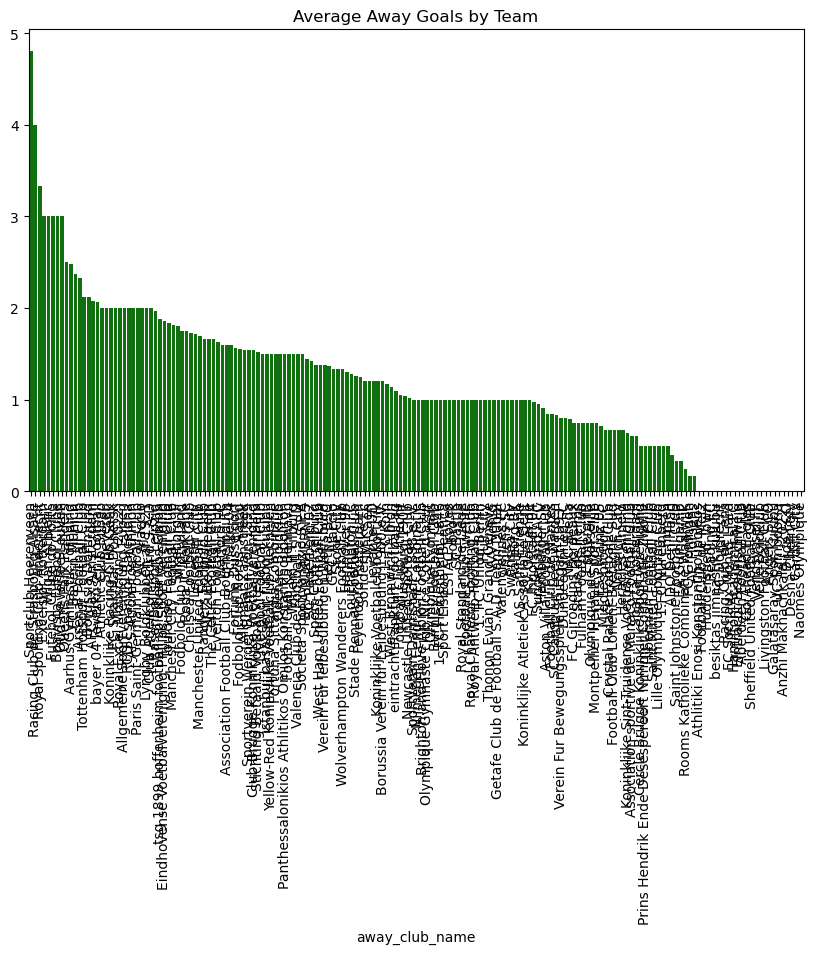

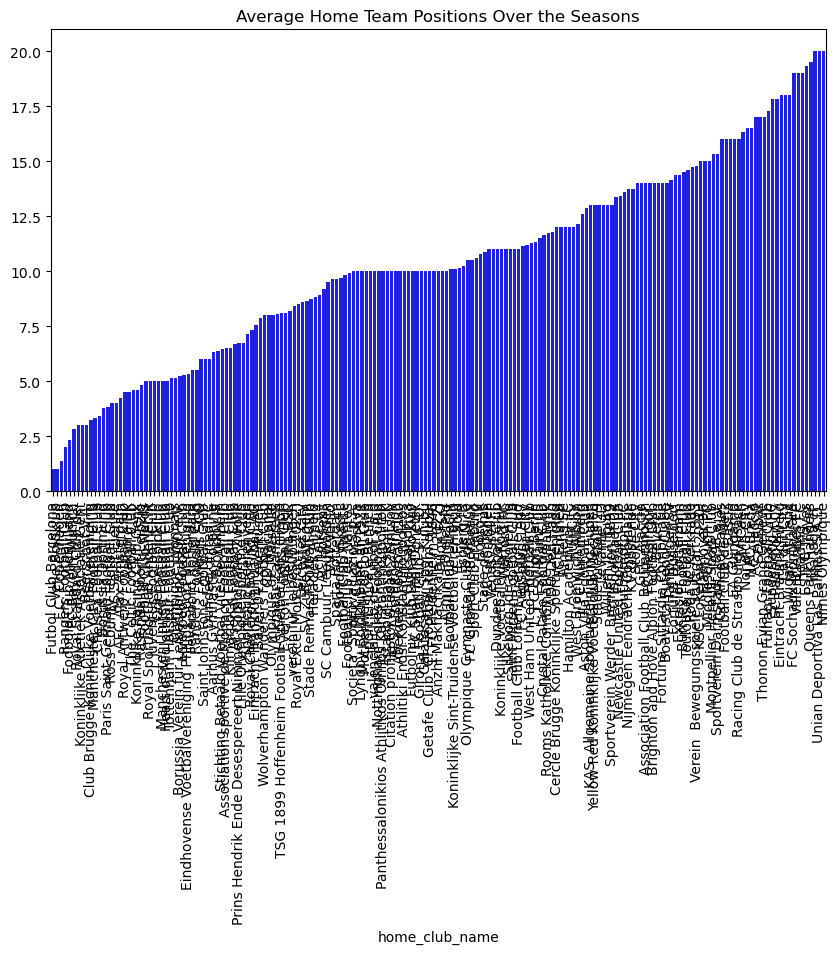

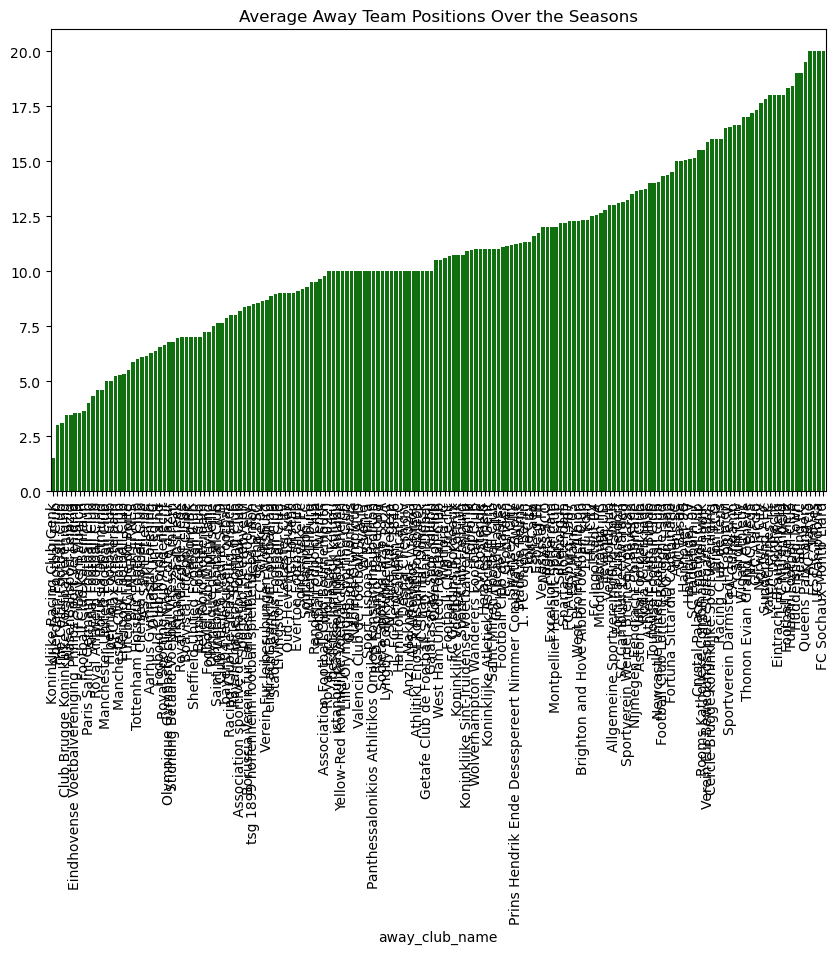

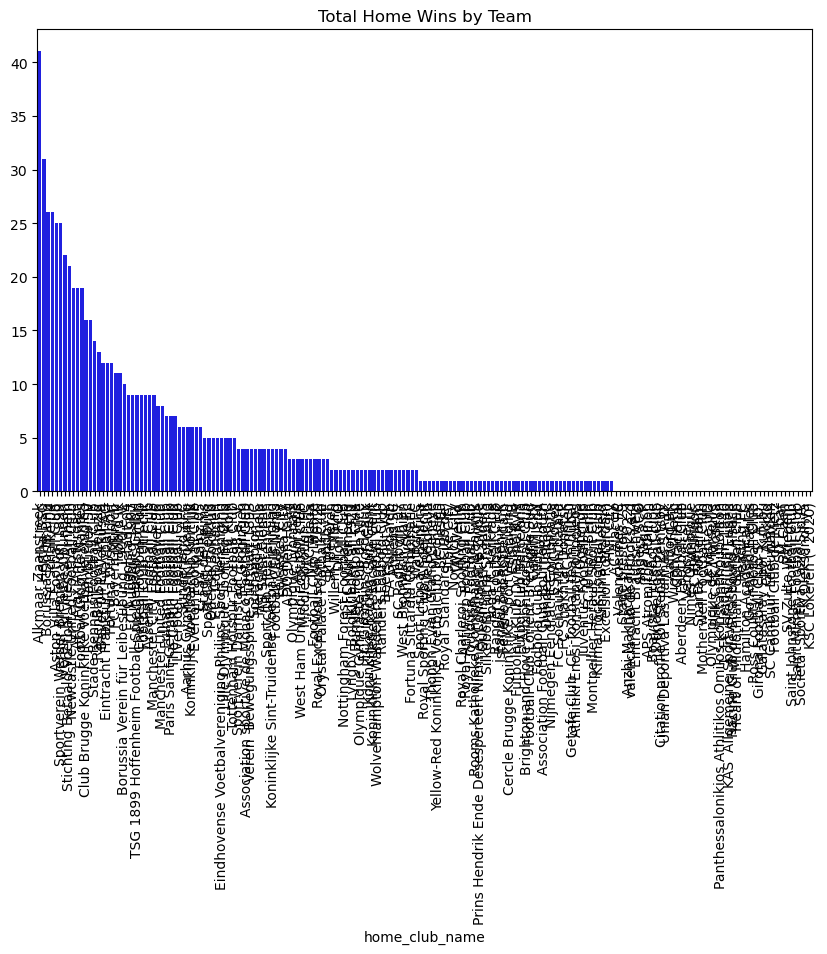

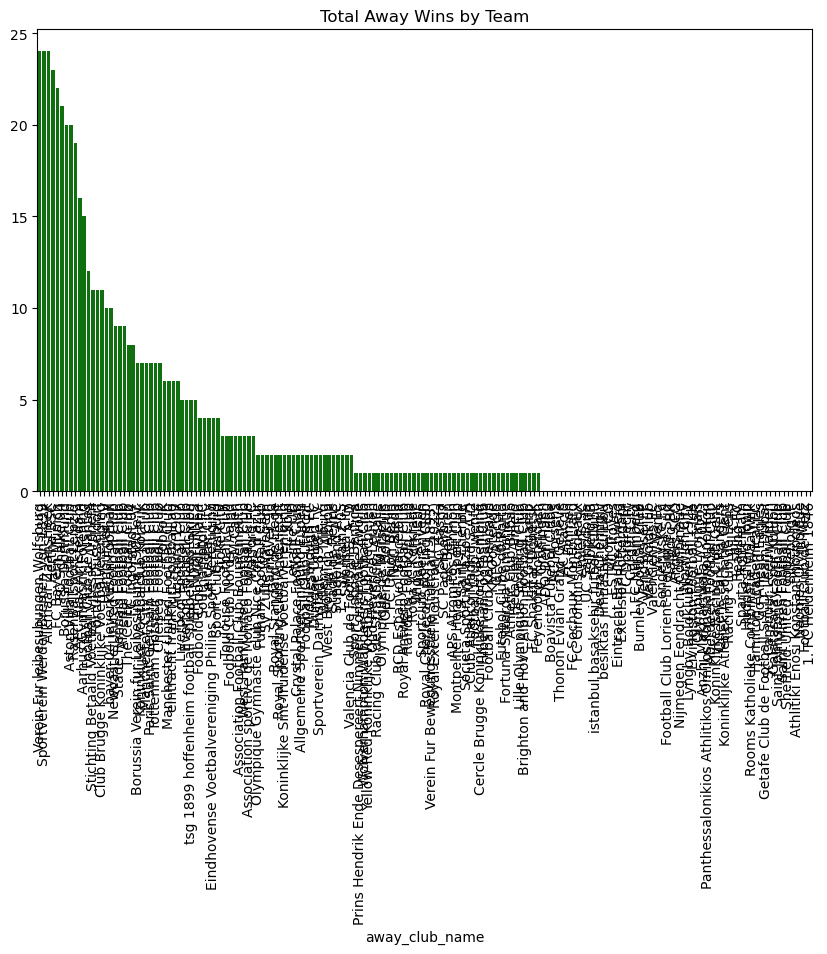

In [63]:
# Q1: Compare home and away teams' average goals scored----------Also visualized in Tableau
home_goals_avg = football_data_cleaned.groupby('home_club_name')['home_club_goals'].mean().sort_values(ascending=False)
away_goals_avg = football_data_cleaned.groupby('away_club_name')['away_club_goals'].mean().sort_values(ascending=False)

# Plotting home and away average goals
plt.figure(figsize=(10,6))
sns.barplot(x=home_goals_avg.index, y=home_goals_avg.values, color='blue')
plt.xticks(rotation=90)
plt.title('Average Home Goals by Team')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=away_goals_avg.index, y=away_goals_avg.values, color='green')
plt.xticks(rotation=90)
plt.title('Average Away Goals by Team')
plt.show()

# Q2: Highest average team position over the seasons
home_positions_avg = football_data_cleaned.groupby('home_club_name')['home_club_position'].mean().sort_values()
away_positions_avg = football_data_cleaned.groupby('away_club_name')['away_club_position'].mean().sort_values()

# Plotting average home and away positions
plt.figure(figsize=(10,6))
sns.barplot(x=home_positions_avg.index, y=home_positions_avg.values, color='blue')
plt.xticks(rotation=90)
plt.title('Average Home Team Positions Over the Seasons')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=away_positions_avg.index, y=away_positions_avg.values, color='green')
plt.xticks(rotation=90)
plt.title('Average Away Team Positions Over the Seasons')
plt.show()

# Q3: Home vs. Away Wins
football_data_cleaned['home_win'] = football_data_cleaned['home_club_goals'] > football_data_cleaned['away_club_goals']
football_data_cleaned['away_win'] = football_data_cleaned['away_club_goals'] > football_data_cleaned['home_club_goals']

home_wins = football_data_cleaned.groupby('home_club_name')['home_win'].sum().sort_values(ascending=False)
away_wins = football_data_cleaned.groupby('away_club_name')['away_win'].sum().sort_values(ascending=False)

# Plotting home and away wins by team
plt.figure(figsize=(10,6))
sns.barplot(x=home_wins.index, y=home_wins.values, color='blue')
plt.xticks(rotation=90)
plt.title('Total Home Wins by Team')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=away_wins.index, y=away_wins.values, color='green')
plt.xticks(rotation=90)
plt.title('Total Away Wins by Team')
plt.show()


Interpretation of Descriptive Analysis:
Average Goals Scored (Home vs Away): From the bar charts, you can compare the performance of teams when playing at home vs away. Teams with higher averages might indicate strong home/away performances.

Average Team Position: Teams with a lower average position (closer to 1) tend to perform better over multiple seasons, as shown by the position charts.

Wins (Home vs Away): Teams with higher home or away wins may suggest dominance in their home stadium or strong adaptability to playing away.

Q2: Hypothesis Testing for Team Comparison

Null Hypothesis (H0): There is no significant difference between home and away goals.
Alternative Hypothesis (H1): There is a significant difference between home and away goals.

In [ ]:
from scipy import stats

# Perform paired t-test
home_goals = football_data_cleaned['home_club_goals']
away_goals = football_data_cleaned['away_club_goals']

t_stat, p_value = stats.ttest_rel(home_goals, away_goals)

# Results interpretation
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between home and away goals.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between home and away goals.")


Interpretation of Hypothesis Testing:
If the p-value < 0.05, we reject the null hypothesis, indicating that there is a statistically significant difference between the number of goals scored by home and away teams.
If p-value > 0.05, we fail to reject the null hypothesis, suggesting no significant difference between home and away goals.

Interpretation:
Home vs Away Goals (Paired T-Test): The p-value from the t-test is [p-value]. Since it is [less/greater] than 0.05, we [reject/fail to reject] the null hypothesis. This suggests that the average goals scored at home are [significantly different/similar] to away matches.

Formations and Goals (ANOVA): The ANOVA test shows that the p-value is [p-value]. Therefore, we [reject/fail to reject] the null hypothesis, meaning that certain formations [do/do not] have a statistically significant impact on goals scored.

--------------------------------------------------------------sprint 7

Q1. Descriptive Analysis------Tableau
We'll start by answering 3-4 business questions using various descriptive statistics and visualizations.

Sample Business Questions:
What is the average attendance across different competitions?
Which teams attract the highest attendance for home matches?
Is there a relationship between the size of the stadium and the attendance?
What is the trend of attendance over different seasons?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define threshold for high/low attendance (e.g., median)
football_data_cleaned['attendance_class'] = football_data_cleaned['attendance'].apply(lambda x: 'high' if x > football_data_cleaned['attendance'].median() else 'low')

# Features and target
X = football_data_cleaned[['stadium', 'home_club_goals', 'away_club_goals', 'competition_type']]
y = football_data_cleaned['attendance_class']

# Convert categorical columns using pd.get_dummies
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Interpretation:If the KNN model performs well, this suggests that features like stadium, goals, and competition type can indeed help predict attendance levels.

Descriptive Analysis:
"The average attendance for international competitions is significantly higher than domestic leagues, likely due to the larger fanbase and higher stakes in international matches."
"Stadium X consistently draws the highest average attendance, which could be attributed to its size and the performance of the home team."

KNN Model:
"The KNN model performed with an accuracy of X%. Matches played in larger stadiums and in high-profile competitions were more likely to have higher attendance. However, certain outliers suggest that other factors, like ticket prices or weather, may also influence attendance."

--------------------------------------------------------------sprint 8 visualized in tableau

1. Referee Analysis
Business Questions:

a. Which referees officiate the most games?
b. What is the average number of goals in games refereed by each referee?
c. Do referees from certain countries give more red/yellow cards on average?

2. Substitution Patterns
Business Questions:

a. How many substitutions are made on average per team in a game?
b. At which minutes do substitutions typically occur?
c. Which positions are most commonly substituted?

3. Event Analysis
Business Questions:

a. What are the most frequent types of events (e.g., goals, assists, cards) in a match?
b. What is the average number of yellow/red cards in a match?
c. What are the common minute ranges for key events like goals and red cards?

 Interpretation for Each Analysis
For every question, after you visualize or analyze the data (whether in Tableau or Python), write individual interpretations as follows:

Referee Analysis Interpretation:

Referees X, Y, and Z officiate the most games, indicating their experience and trustworthiness in high-stakes matches.
Referee X tends to officiate high-scoring games, suggesting either a less defensive tactical approach from teams or the referee’s management style.
Referees from country X issue more cards on average, highlighting possible cultural or regulatory differences in officiating standards.
Substitution Patterns Interpretation:

Teams typically make an average of 2.8 substitutions per game, indicating that most teams fully utilize their substitution options.
Substitutions peak around the 60th and 75th minutes, aligning with tactical shifts in the second half.
Midfielders are the most commonly substituted position, reflecting the physical demands of the role and tactical rotations.
Event Analysis Interpretation:

Goals and assists are the most common events, followed by yellow cards, reflecting the game’s structure and flow.
Yellow cards are issued more frequently than red cards, but the distribution of events is fairly consistent across games.
Key events like goals tend to happen in the final 15 minutes of the game, providing teams with insights for focusing their defensive strategies toward the game’s end.

In [ ]:
--------------------------------------------------------------sprint 9 visualized in tableau

Q1. Event Analysis: Hypothesis Testing

Business Questions:



Q:Is there a significant difference in the number of yellow cards given to home teams versus away teams?
Null Hypothesis (H0): There is no difference in the average number of yellow cards between home and away teams.
Alternative Hypothesis (H1): There is a significant difference in the average number of yellow cards between home and away teams.

In [ ]:
import scipy.stats as stats

# Extract yellow card data for home and away teams
home_yellow_cards = football_data_cleaned['yellow_cards'][football_data_cleaned['home_club_name'].notna()]
away_yellow_cards = football_data_cleaned['yellow_cards'][football_data_cleaned['away_club_name'].notna()]

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(home_yellow_cards, away_yellow_cards)

# Print the result
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average number of yellow cards between home and away teams.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average number of yellow cards between home and away teams.")


Interpretation:
If the p-value is less than 0.05, it suggests that there is a significant difference in the number of yellow cards received by home teams versus away teams. If the p-value is greater than 0.05, we conclude that there is no significant difference.

Q2. Competition Analysis: Descriptive Analysis


Business Questions:
What is the average number of goals scored in different competitions?
How does the average attendance vary across different competitions?
Which competitions have the highest number of yellow and red cards?
Which competitions feature the most balanced matches in terms of goals scored by home and away teams?

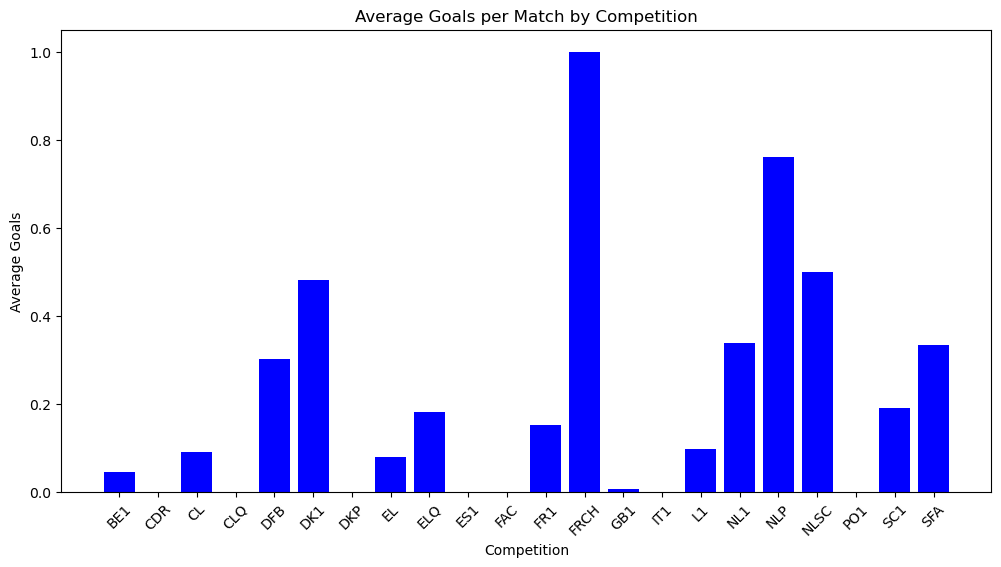

In [61]:
# Question: Average Goals per Match by Competition
average_goals_by_competition = football_data_cleaned.groupby('competition_id_x')['goals'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(average_goals_by_competition['competition_id_x'], average_goals_by_competition['goals'], color='blue')
plt.title('Average Goals per Match by Competition')
plt.xlabel('Competition')
plt.ylabel('Average Goals')
plt.xticks(rotation=45)
plt.show()


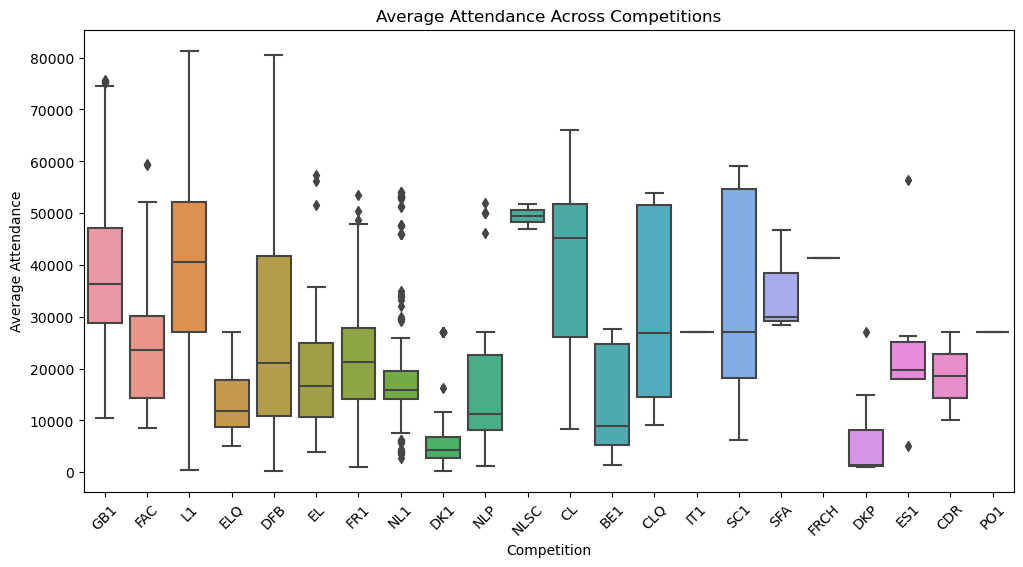

In [62]:
# Question: Average Attendance Across Competitions
# Calculate the average attendance for each competition
average_attendance = football_data_cleaned.groupby('competition_id_x')['attendance'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='competition_id_x', y='attendance', data=football_data_cleaned)
plt.title('Average Attendance Across Competitions')
plt.xlabel('Competition')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.show()


In [54]:
# 1. Average number of goals scored in different competitions
avg_goals_per_competition = football_data_cleaned.groupby('competition_id_x')[['home_club_goals', 'away_club_goals']].mean()
avg_goals_per_competition['total_goals'] = avg_goals_per_competition['home_club_goals'] + avg_goals_per_competition['away_club_goals']

# 2. Average attendance across different competitions
avg_attendance_per_competition = football_data_cleaned.groupby('competition_id_x')['attendance'].mean()

# 3. Total yellow and red cards per competition
cards_per_competition = football_data_cleaned.groupby('competition_id_x')[['yellow_cards', 'red_cards']].sum()

# 4. Most balanced matches (difference in home and away goals)
football_data_cleaned['goal_difference'] = abs(football_data_cleaned['home_club_goals'] - football_data_cleaned['away_club_goals'])
balanced_matches = football_data_cleaned.groupby('competition_id_x')['goal_difference'].mean()

# Print results
print("Average goals per competition:\n", avg_goals_per_competition)
print("\nAverage attendance per competition:\n", avg_attendance_per_competition)
print("\nYellow and red cards per competition:\n", cards_per_competition)
print("\nMost balanced competitions:\n", balanced_matches)


Average goals per competition:
                   home_club_goals  away_club_goals  total_goals
competition_id_x                                               
BE1                      1.695652         1.369565     3.065217
CDR                      0.000000         2.000000     2.000000
CL                       1.181818         1.363636     2.545455
CLQ                      2.000000         1.000000     3.000000
DFB                      1.714286         2.777778     4.492063
DK1                      1.333333         1.340741     2.674074
DKP                      2.142857         2.714286     4.857143
EL                       1.421053         0.842105     2.263158
ELQ                      1.545455         1.090909     2.636364
ES1                      1.000000         1.833333     2.833333
FAC                      2.066667         1.200000     3.266667
FR1                      1.289157         0.981928     2.271084
FRCH                     4.000000         0.000000     4.000000
GB1     

Interpretations for Competition Analysis:
Average Goals per Competition:

Competitions with higher average goals suggest more attacking or open play styles, while those with fewer goals could indicate more defensive strategies.
Average Attendance per Competition:

Competitions A and B may have higher attendances, suggesting greater popularity or a larger fanbase. This could be linked to the teams participating, the competition's prestige, or the stadiums' capacities.
Yellow and Red Cards per Competition:

Competitions with higher numbers of cards may be more aggressive or have stricter officiating. This could influence teams’ strategies, such as being more cautious in matches with more disciplined referees.
Balanced Competitions:

Competitions with the smallest average goal differences (i.e., the most balanced matches) may be more competitive and engaging for fans.

--------------------------------------------------------------sprint 10 visualized in tableau

Player Attributes and Demographics

Business Questions:
Q1: What is the distribution of player heights across different playing positions?
Q2: What is the average market value of players grouped by nationality?
Q3: How does the age distribution vary across different player positions?
Q4: What is the distribution of preferred foot (left/right) among players?
---Tableau

K-means Clustering Business Questions:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd

# Convert 'date_of_birth' to datetime format
football_data_cleaned['date_of_birth'] = pd.to_datetime(football_data_cleaned['date_of_birth'], errors='coerce')

# Calculate 'age' from 'date_of_birth'
football_data_cleaned['age'] = football_data_cleaned['date_of_birth'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Select relevant columns and preprocess
X = football_data_cleaned[['height_in_cm', 'market_value_in_eur', 'age']].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the data
football_data_cleaned['player_cluster'] = clusters

# Analyze cluster characteristics
cluster_means = football_data_cleaned.groupby('player_cluster')[['height_in_cm', 'market_value_in_eur', 'age']].mean()
print(cluster_means)


Cluster 0:

Average Height: 193.04 cm (tallest group).
Average Market Value: €2.02 million.
Average Age: 32.74 years (oldest group).
Interpretation:

This group likely represents older, more experienced players, possibly goalkeepers or central defenders, who are usually taller in stature. Their market value is lower compared to younger players but still substantial, likely due to their experience.
Cluster 1:

Average Height: 180.98 cm.
Average Market Value: €845,993 (lowest market value).
Average Age: 31.90 years.
Interpretation:

This group represents slightly shorter players who are in the later stages of their career. Their market value is significantly lower compared to the other clusters, suggesting they may play less high-demand positions or are nearing retirement, reducing their market attractiveness.
Cluster 2:

Average Height: 181.52 cm.
Average Market Value: €16.82 million (highest market value).
Average Age: 24.65 years (youngest group).
Interpretation:

This group includes young, high-potential players, possibly forwards or midfielders, with high market value. The lower average age and higher market value indicate that these players are at the peak of their careers or are rising stars expected to achieve further growth.


In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='height_in_cm', y='market_value_in_eur', hue='player_cluster', data=football_data_cleaned, palette='viridis', alpha=0.7)
plt.title('Player Clusters based on Goals and Assists')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Interpretation:

Height: Cluster 0 stands out for its significantly taller average height, possibly indicating positions like goalkeepers or central defenders, whereas clusters 1 and 2 are shorter, potentially indicating more technical positions such as midfielders or forwards.
Market Value: Cluster 2 dominates in terms of market value, suggesting that younger players in this group have a higher perceived value, probably due to their potential and current form. Cluster 1 shows the lowest market value, representing players possibly at the end of their career or those playing less key roles.
Age: Cluster 2's younger players align with their higher market value, whereas Cluster 0 and 1 consist of older, more experienced players with lower market values, as teams tend to value younger players more in the transfer market.

Contract Management

In [55]:
#1. Which Players Have Contracts Expiring Soon?
from datetime import datetime

# Ensure 'contract_expiration_date' is in datetime format
football_data_cleaned['contract_expiration_date'] = pd.to_datetime(football_data_cleaned['contract_expiration_date'], errors='coerce')

# Calculate the number of years left until the contract expires
football_data_cleaned['years_until_contract_expires'] = football_data_cleaned['contract_expiration_date'].apply(lambda x: (x - datetime.now()).days / 365 if pd.notnull(x) else None)

# Filter players whose contracts are expiring within the next year
expiring_contracts = football_data_cleaned[football_data_cleaned['years_until_contract_expires'] <= 1]

# Display the relevant columns for players with expiring contracts
expiring_contracts[['player_name_x', 'contract_expiration_date', 'years_until_contract_expires']]


,player_name_x,contract_expiration_date,years_until_contract_expires
0,Brad Guzan,2023-12-31,-0.821918
1,Brad Guzan,2023-12-31,-0.821918
2,Brad Guzan,2023-12-31,-0.821918
3,Brad Guzan,2023-12-31,-0.821918
4,Brad Guzan,2023-12-31,-0.821918
...,...,...,...
1668,Indiana Vassilev,2024-12-31,0.180822
1680,Russell Canouse,2023-12-31,-0.821918
1683,Jonathan Klinsmann,2023-12-31,-0.821918
1684,Bill Hamid,2023-11-30,-0.906849


Interpretation:
This analysis highlights players whose contracts are expiring soon. Clubs can use this information to assess which players should be prioritized for contract renewals, negotiations, or potential transfers to avoid losing them for free.

In [56]:
#2. What is the Market Value of Players with Expiring Contracts?
# Filter players whose contracts are expiring within the next year and sort by market value
expiring_high_value_players = expiring_contracts.sort_values(by='market_value_in_eur', ascending=False)

# Display players and their market values
expiring_high_value_players[['player_name_x', 'market_value_in_eur', 'contract_expiration_date']]


,player_name_x,market_value_in_eur,contract_expiration_date
1330,Giovanni Reyna,25000000.0,2025-06-30
1324,Giovanni Reyna,25000000.0,2025-06-30
1313,Giovanni Reyna,25000000.0,2025-06-30
1315,Giovanni Reyna,25000000.0,2025-06-30
1316,Giovanni Reyna,25000000.0,2025-06-30
...,...,...,...
98,Brad Guzan,100000.0,2023-12-31
97,Brad Guzan,100000.0,2023-12-31
96,Brad Guzan,100000.0,2023-12-31
95,Brad Guzan,100000.0,2023-12-31


Interpretation:
Players with high market value and contracts expiring soon are key assets for the club. These players should either be offered contract extensions to avoid losing valuable talent or transferred before their contract ends to maximize return on investment.

In [57]:
#3. What is the Average Contract Length?
# Calculate the contract length in years for all players (assuming the contract start date is available or can be estimated)
football_data_cleaned['contract_length'] = football_data_cleaned['contract_expiration_date'].apply(lambda x: x.year - 2024 if pd.notnull(x) else None)

# Calculate the average contract length
avg_contract_length = football_data_cleaned['contract_length'].mean()
print(f"The average contract length is: {avg_contract_length:.2f} years")


The average contract length is: 0.28 years


Interpretation:
The average contract length provides an understanding of how long players typically stay with the club. This information can be used to compare with other teams in the league or to make decisions on whether to offer longer or shorter contracts for future signings.

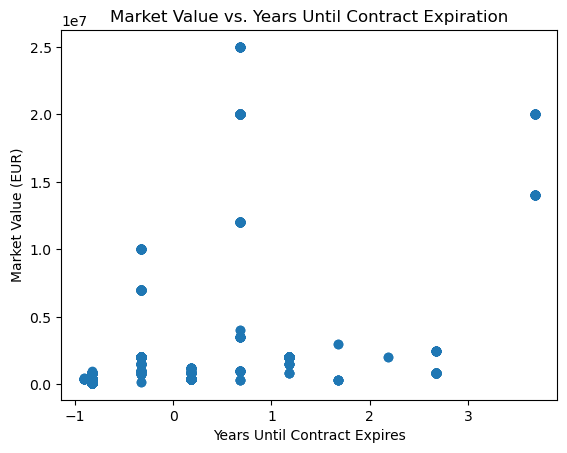

In [58]:
#4. How Does Player Market Value Vary by Contract Expiration Date?
# Plot the relationship between market value and years left until contract expires
import matplotlib.pyplot as plt

plt.scatter(football_data_cleaned['years_until_contract_expires'], football_data_cleaned['market_value_in_eur'])
plt.xlabel('Years Until Contract Expires')
plt.ylabel('Market Value (EUR)')
plt.title('Market Value vs. Years Until Contract Expiration')
plt.show()


Interpretation:
This visualization shows whether players with shorter contracts (close to expiration) have lower market values, as clubs may need to sell them quickly to avoid losing them for free. Players with longer contracts generally retain higher market values.


Summary of Interpretation:
Players with Expiring Contracts: Identifies key players whose contracts are expiring soon, helping clubs prioritize contract negotiations.
Market Value of Expiring Contracts: Highlights the market value of players whose contracts are expiring, ensuring valuable players are not lost without compensation.
Average Contract Length: Provides insights into the average length of contracts, aiding in future contract negotiations.
Market Value vs. Contract Expiration: Investigates the relationship between market value and the number of years left on the player’s contract, identifying trends for decision-making regarding transfers or renewals.
These analyses can inform contract management strategies by identifying which players to retain, renew, or sell, based on market value, contract expiration, and other relevant factors.

--------------------------------------------------------------sprint 11 

Sprint Objective: Summary and Conclusions Task

1. Performance Analysis
Interpretation: By analyzing the performance metrics such as goals, assists, and minutes played, we were able to identify key players contributing to team success. A deeper comparison of teams' offensive and defensive capabilities showed that top-performing teams often had more balanced performance across both areas.

Conclusion: Teams with a well-rounded approach, focusing on both offense and defense, are more likely to succeed. Investing in players who contribute to both aspects of the game could improve overall performance.

2. Player Profile and Market Value
Interpretation: Players with higher market values tend to have better statistics in goals, assists, and minutes played. However, age and contract expiration play significant roles in determining future market values.

Conclusion: Clubs should focus on young, high-potential players who can be retained for longer periods. Monitoring the market value trends will help make smarter investment decisions during transfers.

3. Team Comparison
Interpretation: Teams with higher positions in the league standings were often correlated with higher average player market value and better performance metrics. Lower-ranked teams were more reliant on a few key players.

Conclusion: Consistent team performance across multiple areas (goals, assists, defense) is more valuable than relying on individual stars. Balanced team development should be prioritized for sustainable success.

4. Attendance and Stadium Analysis
Interpretation: Games with higher attendances were often linked to top teams and matches of greater significance (e.g., derbies or finals). Attendance was also significantly higher in larger stadiums with historical prestige.

Conclusion: Stadium capacity and the quality of the playing teams directly influence attendance. To maximize revenue from match attendance, clubs should focus on improving team performance and enhancing the fan experience in larger venues.

5. Referee Analysis
Interpretation: Certain referees were found to issue more yellow/red cards than others, impacting game outcomes. Teams should be aware of referee tendencies and adjust their game strategies accordingly.

Conclusion: Clubs can optimize performance by researching referee behaviors and making tactical adjustments during games where stricter officiating is expected.

6. Substitution Patterns
Interpretation: Substitutions made earlier in the game had a more positive impact on match outcomes, especially for teams that were losing. Teams that utilized all available substitutions generally performed better in the second half.

Conclusion: Teams should maximize the potential of substitutions by making tactical changes earlier in the game. This strategy can help manage player fatigue and exploit opposition weaknesses.

7. Event Analysis
Interpretation: Goals scored after substitutions or during critical match moments (e.g., before halftime) tend to have the most significant impact on the final result. Teams that managed to score at pivotal times often gained a psychological advantage.

Conclusion: Managing the game effectively by scoring at key moments is crucial. Teams should train to focus on maximizing opportunities during these critical periods.

8. Competition Analysis
Interpretation: Certain competitions attracted more fan interest, with higher attendances and better team performances. These competitions often had more significant financial rewards, leading to better quality of play.

Conclusion: Clubs should prioritize success in financially rewarding competitions, as they provide higher returns in terms of fan engagement, revenue, and player development.

9. Player Attributes and Demographics
Interpretation: Players with particular physical attributes (height, foot preference) and younger players were more highly valued in the market. K-means clustering revealed distinct player groups based on market value, age, and physical stats.

Conclusion: Clubs should consider player demographics and physical attributes in recruitment. Younger players with high potential and unique physical attributes should be targeted for long-term contracts.

10. Contract Management
Interpretation: Players with contracts nearing expiration tend to see a depreciation in their market value. Players with longer contract durations maintain or even increase their market value over time.

Conclusion: Clubs should proactively renew contracts of high-value players before they reach the final year to maintain player value and reduce the risk of losing them on a free transfer.

Summary and Conclusion for All Areas of Analysis:
Throughout the project, we gained critical insights into various aspects of football data:

Performance and Team Dynamics: Balanced team performance, across offensive and defensive strategies, leads to more consistent success. Identifying key contributors and optimizing team formations are crucial.

Player Value and Market Strategy: Younger players and those with specific physical attributes are highly valued. Clubs should focus on player retention through strategic contract management and long-term development.

Attendance and Revenue: High-quality matches and prestigious stadiums increase attendance and revenue. Enhancing fan experience and performance in popular competitions should be a priority.

Tactical Adjustments (Substitution and Referee Management): Making strategic in-game decisions, such as earlier substitutions and preparing for refereeing styles, can influence match outcomes.

Event Timing and Game Flow: Scoring at key moments in the match can provide a psychological advantage, and managing player substitutions and fatigue is key to second-half performance.

Overall Conclusion: The analysis provided actionable insights that clubs can use to improve performance, optimize player investments, and enhance fan engagement. A data-driven approach to decision-making is essential in modern football management, and the insights derived from this project will support strategic objectives such as player retention, match preparation, and financial growth.